# <center>Preprocessing<center>

## Import libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.max_rows = 999

## Path to the data

In [4]:
PATH = 'Dataset'
PATH_TO_train_data = PATH + '/' + 'train.csv'
PATH_TO_test_data = PATH + '/' + 'test.csv'
PATH_TO_building_structure = PATH + '/' + 'Building_Structure.csv'
PATH_TO_building_ownership = PATH + '/' + 'Building_Ownership_Use.csv'

In [5]:
train_data = pd.read_csv(PATH_TO_train_data)

In [6]:
building_structure_data = pd.read_csv(PATH_TO_building_structure)
building_ownership_data = pd.read_csv(PATH_TO_building_ownership)

## Shape of different data sets

In [7]:
train_data.shape

(631761, 14)

In [8]:
building_structure_data.shape

(1052948, 29)

In [9]:
building_ownership_data.shape

(1052948, 17)

## Distribution of classes: 5 tier classification problem

In [10]:
%matplotlib inline

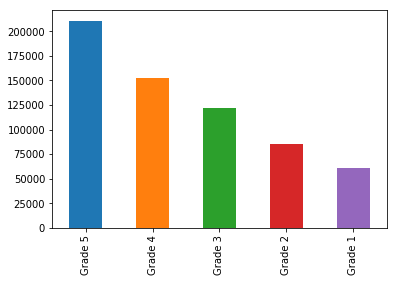

In [11]:
train_data.damage_grade.value_counts().plot('bar')

## Merge building structure data with train data using "building_id"

In [12]:
train_data = pd.merge(train_data, building_structure_data, on='building_id')

In [13]:
train_data.shape

(631761, 42)

## Merge building ownership data with train data using "building_id"

In [14]:
train_data = pd.merge(train_data, building_ownership_data, on='building_id')

In [15]:
train_data.shape

(631761, 58)

In [16]:
train_data.head()

,area_assesed,building_id,damage_grade,district_id_x,has_geotechnical_risk,has_geotechnical_risk_fault_crack,has_geotechnical_risk_flood,has_geotechnical_risk_land_settlement,has_geotechnical_risk_landslide,has_geotechnical_risk_liquefaction,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,Both,24385bfd2a2,Grade 4,24,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Both,405d1bbebbf,Grade 2,44,0.0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,Both,351d9bc71f6,Grade 1,36,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Building removed,2be3a971166,Grade 5,30,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Both,34c7d073ea6,Grade 3,36,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Data types of all columns. Change all the non-numeric columns into one hot representation.

In [17]:
train_data.dtypes

area_assesed                               object
building_id                                object
damage_grade                               object
district_id_x                               int64
has_geotechnical_risk                     float64
has_geotechnical_risk_fault_crack           int64
has_geotechnical_risk_flood                 int64
has_geotechnical_risk_land_settlement       int64
has_geotechnical_risk_landslide             int64
has_geotechnical_risk_liquefaction          int64
has_geotechnical_risk_other                 int64
has_geotechnical_risk_rock_fall             int64
has_repair_started                        float64
vdcmun_id_x                                 int64
district_id_y                               int64
vdcmun_id_y                                 int64
ward_id_x                                   int64
count_floors_pre_eq                         int64
count_floors_post_eq                        int64
age_building                                int64


## Store all the columns in a list that are non numeric columns

In [18]:
object_type_columns = ['area_assesed', 'land_surface_condition', 'foundation_type', 'roof_type', 'ground_floor_type', 'other_floor_type', 'position', 'plan_configuration', 'condition_post_eq', 'legal_ownership_status']

In [19]:
train_data.head()

,area_assesed,building_id,damage_grade,district_id_x,has_geotechnical_risk,has_geotechnical_risk_fault_crack,has_geotechnical_risk_flood,has_geotechnical_risk_land_settlement,has_geotechnical_risk_landslide,has_geotechnical_risk_liquefaction,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,Both,24385bfd2a2,Grade 4,24,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Both,405d1bbebbf,Grade 2,44,0.0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,Both,351d9bc71f6,Grade 1,36,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Building removed,2be3a971166,Grade 5,30,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Both,34c7d073ea6,Grade 3,36,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Find the columns that has missing values

In [20]:
columns_has_NaN = train_data.isna().sum()

In [21]:
columns_has_NaN = columns_has_NaN[columns_has_NaN.nonzero()[0]]

In [22]:
columns_has_NaN

has_repair_started    33417
count_families            1
dtype: int64

In [23]:
total_NaN = columns_has_NaN.sum()
print("Total number of missing values in the training data = " + str(total_NaN))

Total number of missing values in the training data = 33418


## Replace missing values in the column "has repair started" and "count_families" as zero

In [25]:
train_data.fillna(0, inplace=True)

In [26]:
total_NaN = train_data.isna().sum().sum()
print("Total number of missing values in the training data = " + str(total_NaN))

Total number of missing values in the training data = 0


## Change columns into numerical values

In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
# train_data = pd.get_dummies(train_data, columns=object_type_columns, prefix_sep='_', drop_first=True)
number = LabelEncoder()
for col in object_type_columns:
    train_data[col] = number.fit_transform(train_data[col].astype('str'))

In [30]:
train_data.head()

,area_assesed,building_id,damage_grade,district_id_x,has_geotechnical_risk,has_geotechnical_risk_fault_crack,has_geotechnical_risk_flood,has_geotechnical_risk_land_settlement,has_geotechnical_risk_landslide,has_geotechnical_risk_liquefaction,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,0,24385bfd2a2,Grade 4,24,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,405d1bbebbf,Grade 2,44,0.0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,351d9bc71f6,Grade 1,36,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,2be3a971166,Grade 5,30,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,34c7d073ea6,Grade 3,36,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
train_data.dtypes

area_assesed                                int64
building_id                                object
damage_grade                               object
district_id_x                               int64
has_geotechnical_risk                     float64
has_geotechnical_risk_fault_crack           int64
has_geotechnical_risk_flood                 int64
has_geotechnical_risk_land_settlement       int64
has_geotechnical_risk_landslide             int64
has_geotechnical_risk_liquefaction          int64
has_geotechnical_risk_other                 int64
has_geotechnical_risk_rock_fall             int64
has_repair_started                        float64
vdcmun_id_x                                 int64
district_id_y                               int64
vdcmun_id_y                                 int64
ward_id_x                                   int64
count_floors_pre_eq                         int64
count_floors_post_eq                        int64
age_building                                int64


## Train data after preprocessing

In [32]:
train_data.head()

,area_assesed,building_id,damage_grade,district_id_x,has_geotechnical_risk,has_geotechnical_risk_fault_crack,has_geotechnical_risk_flood,has_geotechnical_risk_land_settlement,has_geotechnical_risk_landslide,has_geotechnical_risk_liquefaction,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,0,24385bfd2a2,Grade 4,24,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,405d1bbebbf,Grade 2,44,0.0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,351d9bc71f6,Grade 1,36,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,2be3a971166,Grade 5,30,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,34c7d073ea6,Grade 3,36,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Remove target value from the train data.

In [33]:
X_train = train_data.drop(columns=['damage_grade', 'building_id'])
X_train.head()

,area_assesed,district_id_x,has_geotechnical_risk,has_geotechnical_risk_fault_crack,has_geotechnical_risk_flood,has_geotechnical_risk_land_settlement,has_geotechnical_risk_landslide,has_geotechnical_risk_liquefaction,has_geotechnical_risk_other,has_geotechnical_risk_rock_fall,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,0,24,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,44,0.0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,36,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,30,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,36,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
y_train = pd.DataFrame(train_data.damage_grade)
y_train.head()

,damage_grade
0,Grade 4
1,Grade 2
2,Grade 1
3,Grade 5
4,Grade 3


## Remove duplicate values from the data.

In [35]:
X_train.shape

(631761, 56)

In [36]:
duplicates = X_train.duplicated(keep=False)

In [37]:
X_train = X_train[~duplicates]

In [38]:
X_train.shape

(617725, 56)

In [39]:
y_train = y_train[~duplicates]

In [40]:
y_train.shape

(617725, 1)

In [41]:
total_number_of_features = len(X_train.columns)
print("Total number of features after pre processing = " + str(total_number_of_features))

Total number of features after pre processing = 56


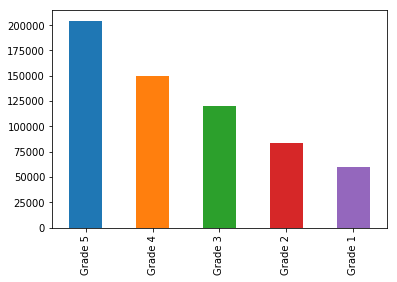

In [42]:
y_train.damage_grade.value_counts().plot('bar')

In [43]:
X_train.head()

,area_assesed,district_id_x,has_geotechnical_risk,has_geotechnical_risk_fault_crack,has_geotechnical_risk_flood,has_geotechnical_risk_land_settlement,has_geotechnical_risk_landslide,has_geotechnical_risk_liquefaction,has_geotechnical_risk_other,has_geotechnical_risk_rock_fall,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,0,24,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,44,0.0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,36,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,30,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,36,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
y_train.head()

,damage_grade
0,Grade 4
1,Grade 2
2,Grade 1
3,Grade 5
4,Grade 3


In [45]:
categories = {'Grade 1': 1, 'Grade 2': 2, 'Grade 3': 3, 'Grade 4': 4, 'Grade 5': 5}
y_train_categories = y_train.damage_grade.map(categories)
y_train_categories = pd.DataFrame({'damage_grade': y_train_categories})
y_train_categories.head()

,damage_grade
0,4
1,2
2,1
3,5
4,3


In [46]:
y_train_one_hot = pd.get_dummies(y_train)
y_train_one_hot.head()

,damage_grade_Grade 1,damage_grade_Grade 2,damage_grade_Grade 3,damage_grade_Grade 4,damage_grade_Grade 5
0,0,0,0,1,0
1,0,1,0,0,0
2,1,0,0,0,0
3,0,0,0,0,1
4,0,0,1,0,0


## As the data is imbalanced, SMOTE algorithm is used to make data balanced.

In [48]:
from imblearn.over_sampling import SMOTE

In [49]:
smote = SMOTE(random_state=0)
os_data_X, os_data_y = smote.fit_sample(X_train, y_train.damage_grade)

In [50]:
X_train_os = pd.DataFrame(data = os_data_X, columns = X_train.columns)
y_train_os = pd.DataFrame(data = os_data_y, columns = ["damage_grade"])

In [51]:
X_train_os.shape, y_train_os.shape

((1021990, 56), (1021990, 1))

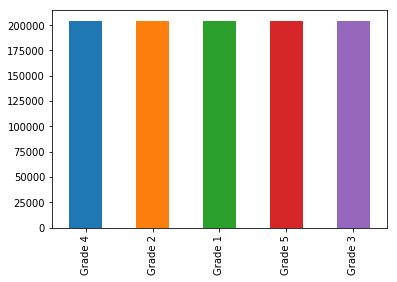

In [52]:
y_train_os.damage_grade.value_counts().plot('bar')

In [53]:
y_train_os.head()

,damage_grade
0,Grade 4
1,Grade 2
2,Grade 1
3,Grade 5
4,Grade 3


In [54]:
dup = X_train_os[X_train_os.duplicated(keep=False)]

In [55]:
dup.shape

(0, 56)

As we can see, there are no duplicates in the train data.

## As per the intuition after seeing the data, the data is not random. So, randomize the data to avoid over fitting.

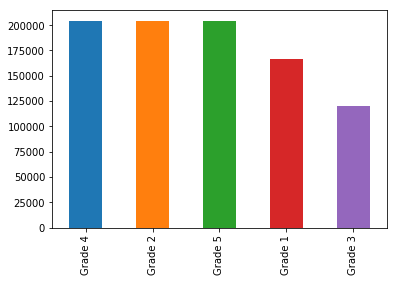

In [56]:
y_train_os.damage_grade.loc[:900000].value_counts().plot('bar')

In [57]:
no_of_rows_before_os = X_train.shape[0]
no_of_rows_after_os = X_train_os.shape[0]

In [58]:
X_train.index = range(len(X_train))
y_train.index = range(len(y_train))
X_train_os.index = range(len(X_train_os))
y_train_os.index = range(len(y_train_os))

In [59]:
y_train_os.shape

(1021990, 1)

In [60]:
import random
index = [i for i in range(no_of_rows_after_os)]
random.shuffle(index)

In [61]:
X_train_os = X_train_os.set_index([index]).sort_index()

In [62]:
y_train_os = y_train_os.set_index([index]).sort_index()

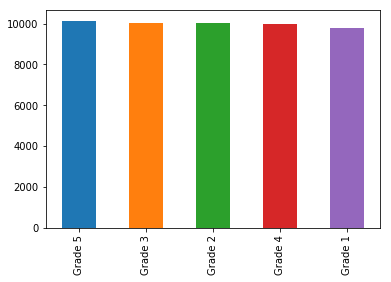

In [63]:
y_train_os.damage_grade.loc[50000:100000].value_counts().plot('bar')

os - over sampling <br>
X_train, y_train are imbalanced. But, X_train_os and y_train_os are balanced after over sampling and shuffling.

## Create varaints of output variable.
1. Grade 1, Grade 2,..
2. 1, 2,...
3. One hot representation.

In [64]:
categories = {'Grade 1': 1, 'Grade 2': 2, 'Grade 3': 3, 'Grade 4': 4, 'Grade 5': 5}
y_train_categories = y_train.damage_grade.map(categories)
y_train_categories = pd.DataFrame({'damage_grade': y_train_categories})
y_train_categories.head()

,damage_grade
0,4
1,2
2,1
3,5
4,3


In [65]:
categories = {'Grade 1': 1, 'Grade 2': 2, 'Grade 3': 3, 'Grade 4': 4, 'Grade 5': 5}
y_train_os_categories = y_train_os.damage_grade.map(categories)
y_train_os_categories = pd.DataFrame({'damage_grade': y_train_os_categories})
y_train_os_categories.head()

,damage_grade
0,5
1,2
2,5
3,1
4,2


In [66]:
y_train_one_hot = pd.get_dummies(y_train)
y_train_one_hot.head()

,damage_grade_Grade 1,damage_grade_Grade 2,damage_grade_Grade 3,damage_grade_Grade 4,damage_grade_Grade 5
0,0,0,0,1,0
1,0,1,0,0,0
2,1,0,0,0,0
3,0,0,0,0,1
4,0,0,1,0,0


In [176]:
y_train_os_one_hot = pd.get_dummies(y_train_os)
y_train_os_one_hot.head()

,damage_grade_Grade 1,damage_grade_Grade 2,damage_grade_Grade 3,damage_grade_Grade 4,damage_grade_Grade 5
0,0,0,1,0,0
1,0,0,1,0,0
2,0,0,0,0,1
3,0,0,1,0,0
4,1,0,0,0,0


## Store all the variants of train data

In [177]:
X_train.to_csv('X_train.csv')
y_train.to_csv('y_train.csv')
y_train_categories.to_csv('y_train_categories.csv')
y_train_one_hot.to_csv('y_train_one_hot.csv')

In [178]:
X_train_os.to_csv('X_train_os.csv')
y_train_os.to_csv('y_train_os.csv')
y_train_os_categories.to_csv('y_train_os_categories.csv')
y_train_os_one_hot.to_csv('y_train_os_one_hot.csv')

## Test data: Preprocess test data similar to train data.

In [180]:
test_data = pd.read_csv(PATH_TO_test_data)
test_data = pd.merge(test_data, building_structure_data, on='building_id')
test_data = pd.merge(test_data, building_ownership_data, on='building_id')

columns_has_NaN = test_data.isna().sum()
columns_has_NaN = columns_has_NaN[columns_has_NaN.nonzero()[0]]
test_data.fillna(0, inplace=True)

for col in object_type_columns:
    test_data[col] = number.fit_transform(test_data[col].astype('str'))

X_test = test_data.drop(columns=['building_id'])

In [181]:
X_test.head()

,area_assesed,district_id_x,has_geotechnical_risk,has_geotechnical_risk_fault_crack,has_geotechnical_risk_flood,has_geotechnical_risk_land_settlement,has_geotechnical_risk_landslide,has_geotechnical_risk_liquefaction,has_geotechnical_risk_other,has_geotechnical_risk_rock_fall,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,0,7,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,7,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,7,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,7,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,7,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [182]:
X_test.to_csv('X_test.csv')